In [2]:
import pylab
import sys
import pymzml
import numpy as np
import pickle
import os
import time
# list all files in current directory with mzML extension even in sub dir
while 1: 
    files = []
    for root, dirs, file in os.walk("/srv/s02/leaves-shared/marshall/"):
        for f in file:
            if f.endswith(".mzML"):
                files.append(os.path.join(root, f))
    len(files)
    # progress bar for 10_000 total
    print(f"[{'#'*int(len(files)/100)}>{'.'*(100-int(len(files)/100))}] {len(files)} / 10_000", end="\r")
    time.sleep(10)

    


KeyboardInterrupt: 

In [ ]:
# input to model normlize to remove refrence 

1002

(5160, 1001)

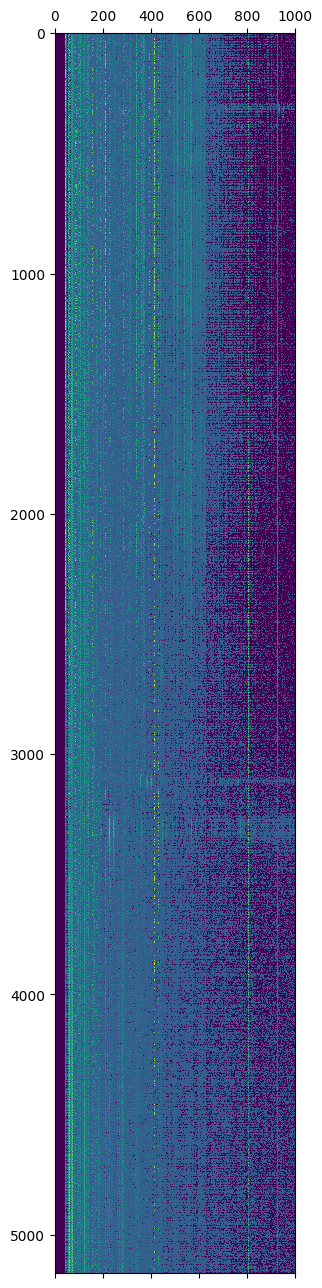

In [105]:
import random
file = random.choice(files)
run = pymzml.run.Reader(file, build_index_from_scratch = True)
TIC = []
for i, spec in enumerate(run):
    mz = spec.peaks("centroided")
    max_mz = max(mz, key = lambda x: x[0])
    if max_mz[0]<200:
        continue
    tmp = np.zeros(shape=(min(int(max_mz[0]), 1000)+1))
    for m, i in mz:
        if m>1000:
            break
        tmp[int(m)] = i
    TIC.append(tmp)
max_length = max([len(i) for i in TIC])
TIC = np.array([np.pad(i, (0, max_length-len(i))) for i in TIC])
min_mz = np.where(TIC.mean(axis=0)==0)[0][-2]
pylab.matshow(np.log10(TIC/TIC.max()+1e-5))
TIC.shape

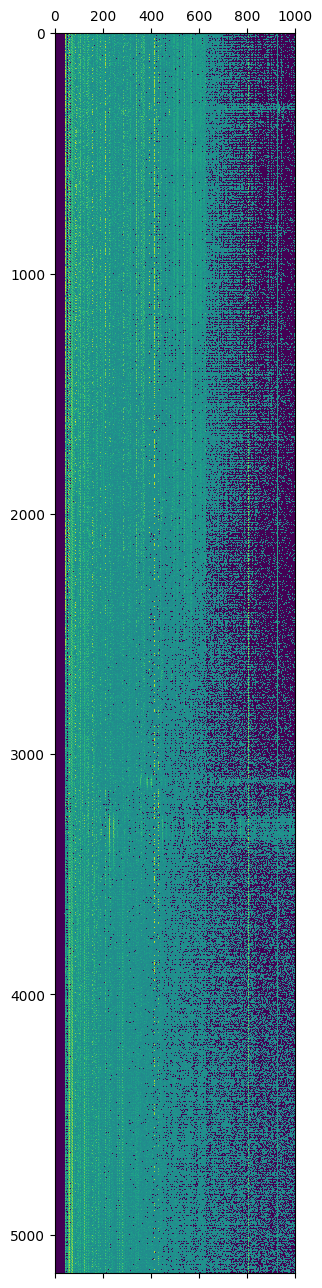

In [116]:
TIC_norm = (TIC - TIC.mean()) / TIC.std()
TIC_norm = (TIC - TIC.min()) / (TIC.max() - TIC.min())
pylab.matshow(np.log(TIC_norm+1e-7))

In [121]:
from PIL import Image
for index, file in enumerate(files):
    print(f"{index}/{len(files)}")
    try:
        run = pymzml.run.Reader(random.choice(files), build_index_from_scratch = True)
        TIC = []
        for i, spec in enumerate(run):
            mz = spec.peaks("centroided")
            max_mz = max(mz, key = lambda x: x[0])
            if max_mz[0]<200:
                continue
            tmp = np.zeros(shape=(min(int(max_mz[0]), 1000)+1))
            for m, i in mz:
                if m>1000:
                    break
                tmp[int(m)] = i
            TIC.append(tmp)
        max_length = max([len(i) for i in TIC])
        TIC = np.array([np.pad(i, (0, max_length-len(i))) for i in TIC])
        min_mz = np.where(TIC.mean(axis=0)==0)[0][-2]
        TIC = TIC[:, min_mz:]
        TIC2 = np.log(TIC/TIC.max()+1e-5)
        TIC2 = (TIC2-TIC2.min())/(TIC2.max()-TIC2.min())*255
        img = Image.fromarray(TIC2).resize((2048,2048)).convert("L")
        img.save(f'images2/{file.split("/")[-1].replace(".mzML","")}.png')
        np.save(f'images2/{file.split("/")[-1].replace(".mzML","")}.npy', TIC2)
    except Exception as e:
        print(e)

0/1618
1/1618
2/1618


KeyboardInterrupt: 

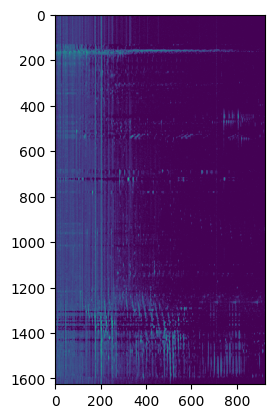

In [101]:
pylab.imshow(TIC2)

AttributeError: 'list' object has no attribute 'max'